# Computer Vision - Laboratory

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [8]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
from skimage.color import rgb2gray, rgba2rgb
from skimage.exposure import rescale_intensity

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [9]:
%matplotlib inline

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

(150, 200) uint8


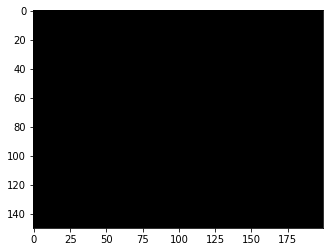

In [10]:
# In order to create the image, an array initialized to 0's with the desired value type.
img = np.zeros((150,200), dtype=np.uint8)
print(img.shape, img.dtype)
plt.imshow(img, cmap='gray')
plt.show()

How many values can each pixel have in this case? 

**Solution:** 

This allows us to represent 2^8 = 256 values in each pixel.

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). 

Visualize the image and print the values of its first row.

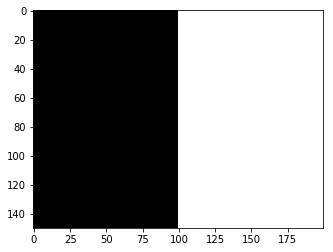

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [11]:
# Since the image is already black, it's only necessary to change the right part to white. This is done by changing the pixels
# values to half of the columns.
img[:, 100:] =  255
plt.imshow(img, cmap='gray')
plt.show()
img[0]

### 1.2 Image saving and loading

a) Use the IO image package to save the image previously created:

In [12]:
io.imsave('blacknwhite.jpeg', img)

b) Load the saved image and visualize it:

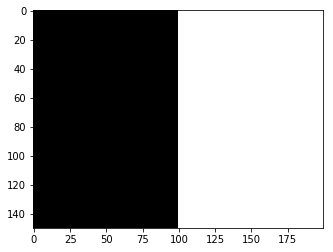

In [13]:
img2 = io.imread('blacknwhite.jpeg')
plt.imshow(img2, cmap='gray')
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `lenna.jpg`, and check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

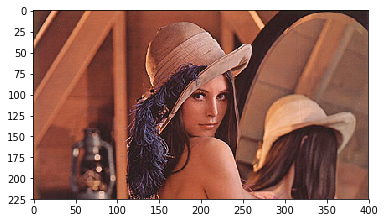

(225, 400, 3)

In [14]:
img3 = io.imread('images/lenna.jpg')
plt.imshow(img3)
plt.show()
img3.shape

b) Convert the previous image to grayscale, visualize its. and save it. Moreover, show both images (RGB & greyscale) details such as shape, dtype, max and min values.

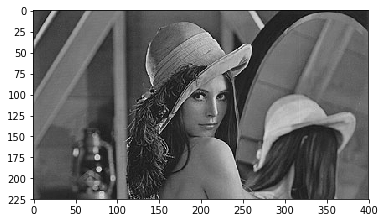

H:\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [15]:
img3_gray = rgb2gray(img3)
plt.imshow(img3_gray, cmap='gray')
plt.show()
io.imsave('lenna_gray.jpg', img3_gray)

In [16]:
print("RGB ->", img3.shape, img3.dtype, img3.max(), img3.min())
print("Greyscale ->", img3_gray.shape, img3_gray.dtype, img3_gray.max(), img3_gray.min())

RGB -> (225, 400, 3) uint8 255 0
Greyscale -> (225, 400) float64 0.9869937254901961 0.0014137254901960784


c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

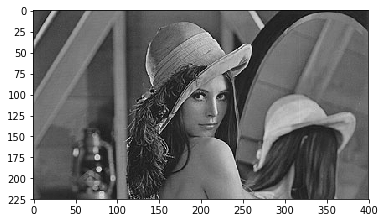

In [17]:
im = io.imread('images/lenna.jpg')
plt.imshow(im)
im = im.mean(2)
plt.imshow(im, cmap='gray')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

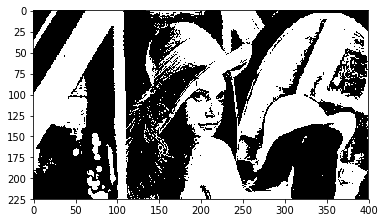

In [18]:
# The matrix is copied to avoid altering the original image. Then with numpy instruction 'where', values below 100 (included)
# are changed to 0 and the ones above to one.
im2 = np.copy(np.where(im <= 100, 0, 1))
plt.imshow(im2, cmap='gray')
# 10th row selected but no column selected, so all will be printed.
im2[10, :]

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

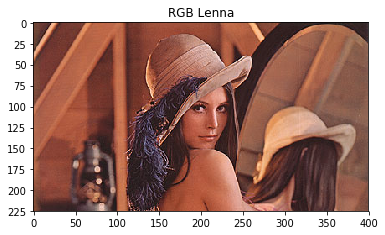

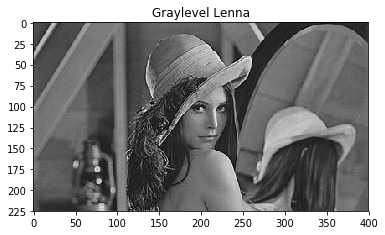

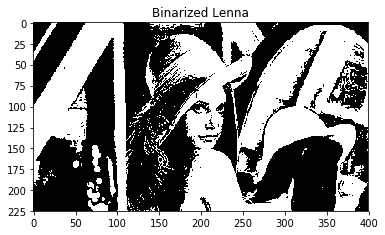

In [19]:
plt.imshow(img3)
plt.title("RGB Lenna")
plt.show()
plt.imshow(im, cmap='gray')
plt.title("Graylevel Lenna")
plt.show()
plt.imshow(im2, cmap='gray')
plt.title("Binarized Lenna")
plt.show()

### 1.4 Images manipulation

a) Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. We recommend to create a bigger black image to later embed the original image in the central part.

In [20]:
# Since we have to create a frame with a determined width, we'll start by creating a new image 1/10th larger in both axis. It's
# also needed that the new image has 3 channels.
frame = np.zeros((225 + 40, 400 + 40, 3), dtype = np.uint8)

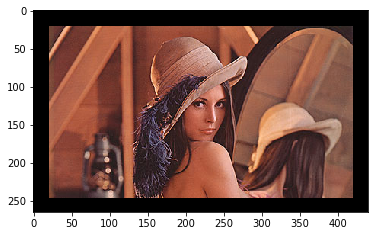

In [21]:
# We cannot broadcast the original image on to the frame, because they don't have the same shape. Instead, two for loops will be
# used. This way, we'll be able to copy the image on to the frame one manually. Since the frame image doesn't use all channels
# (it's all black pixels) we can skip another for loop for interating through the channels.
for row in range(265):
    if row >= 21 and row <= 245:
        for column in range(440):
            if column >= 21 and column <= 419:
                    frame[row, column] = img3[row - 21, column - 20]

plt.imshow(frame)

b) Change the mask of the framed image to red. Visualize the three images with their respective titles.

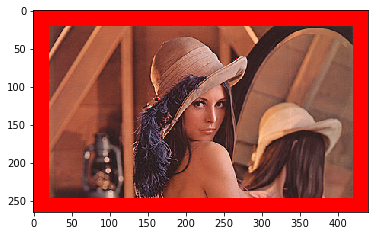

In [22]:
# Simple operation, replacing all black pixels on the image will change the frame colour.
redFrame = np.copy(np.where(frame == 0, [255, 0, 0], frame))
plt.imshow(redFrame)

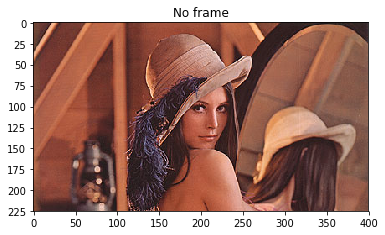

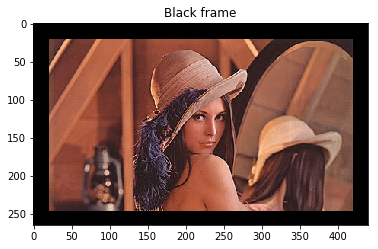

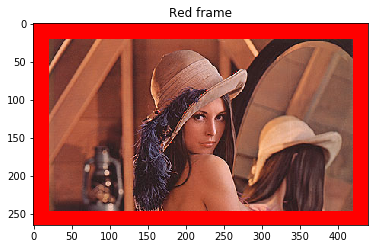

In [23]:
plt.imshow(img3)
plt.title("No frame")
plt.show()
plt.imshow(frame)
plt.title("Black frame")
plt.show()
plt.imshow(redFrame)
plt.title("Red frame")
plt.show()

### 1.5 Contrast enhancement

a) Open the image `car_lowContrast.jpg` and visualize it without graylevel enhancement. To this purpose, check which are the minimal and maximal values and how to use the command imshow without contrast enhancement.

Note: When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default.

Original: min 63 max 193


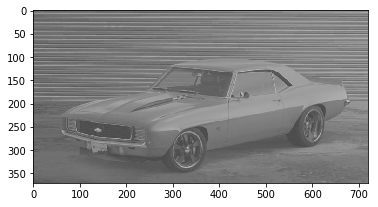

In [24]:
im = io.imread('images/car_lowContrast.jpg')
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
print("Original: min", im.min(), "max",im.max())

b) Create an image called `dark_image` using the  values from the original one, so that the minimal value of the new image is 0. Check the minimal and maximal values of the new image, and compare them with the previous one.

Original: min 63 max 193
dark_image: min 0 max 193


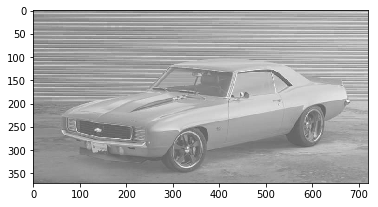

In [25]:
# Again, 'where' function from numpy library is used for replacing the minimal values.
dark_image = np.copy(np.where(im == im.min(), 0, im))
plt.imshow(dark_image, cmap='gray')
print("Original: min", im.min(), "max",im.max())
print("dark_image: min", dark_image.min(), "max",dark_image.max())

c) Create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and compare them with the previous one.

Original: min 63 max 193
bright_im: min 63 max 255


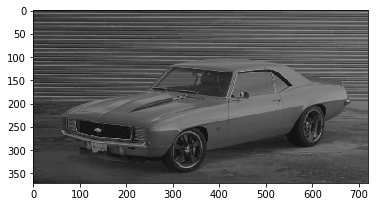

In [26]:
# Again, 'where' function from numpy library is used for replacing the minimal values.
bright_im = np.copy(np.where(im == im.max(), 255, im))
plt.imshow(bright_im, cmap='gray')
print("Original: min", im.min(), "max",im.max())
print("bright_im: min", bright_im.min(), "max",bright_im.max())

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command. Check the minimal and maximal values of the enhanced image, and compare them with the previous one. 

Implement the contrast enhancement using the two different available methods.

Original: min 63 max 193
bright_im: min 0.0 max 255.0


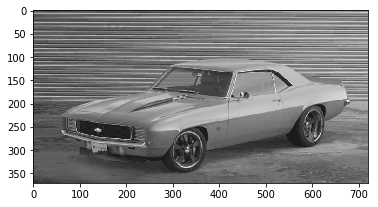

In [27]:
# Contrast enhancement by direct manipulation
# We used the formula mentioned in the slides, in order to enhance our image. We simply aplied the formula to our matrix.
org_im = io.imread('images/car_lowContrast.jpg')
direct_im = (org_im-org_im.min())/(org_im.max()-org_im.min())*255
plt.imshow(direct_im, cmap='gray')
print("Original: min", org_im.min(), "max",org_im.max())
print("bright_im: min", direct_im.min(), "max",direct_im.max())

Original: min 63 max 193
bright_im: min 0 max 255


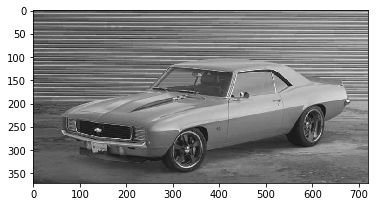

In [28]:
# Contrast enhancement by scikit-image command
# We added the package "exposure" to our imports, to use the command "rescale_intensity" to enhance the image.
org_im = io.imread('images/car_lowContrast.jpg')
command_im = rescale_intensity(org_im)
plt.imshow(command_im, cmap='gray')
print("Original: min", org_im.min(), "max",org_im.max())
print("bright_im: min", command_im.min(), "max",command_im.max())

e) Visualize the 5 images in the same figure, each one with its corresponding title.

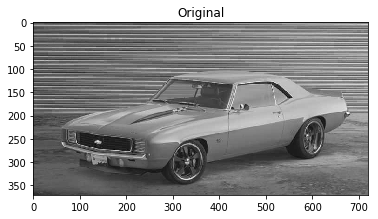

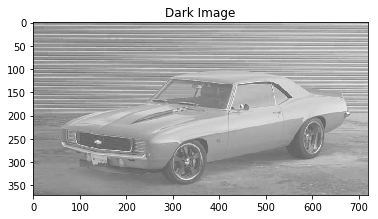

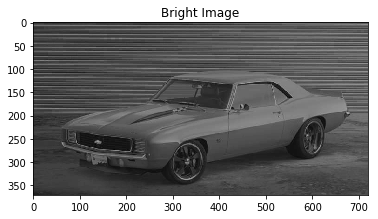

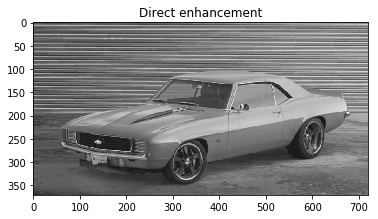

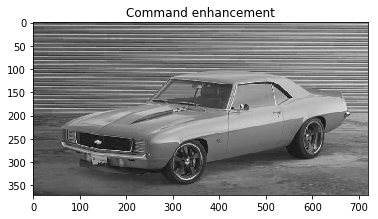

In [29]:
# Ploted the five diferent images that we got in this exercise with the function "plt".
plt.imshow(im,cmap='gray')
plt.title("Original")
plt.show()
plt.imshow(dark_image, cmap='gray')
plt.title("Dark Image")
plt.show()
plt.imshow(bright_im, cmap='gray')
plt.title("Bright Image")
plt.show()
plt.imshow(direct_im, cmap='gray')
plt.title("Direct enhancement")
plt.show()
plt.imshow(command_im, cmap='gray')
plt.title("Command enhancement")
plt.show()

### 1.6 Masks and logical image manipulation

Read the image `circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

In [30]:
circles = io.imread('images/circles.bmp')
# By using unique, we get an array with all the colours from the image. This way, we can filter all the circles one by one since
# they have different colours.
# Another way of doing it, it's by selecting the circles based on the pixels where they are drawn.
# We've used the first option since it's way cooler.
np.unique(circles)

array([  0, 127, 195, 255], dtype=uint8)

In [31]:
left = np.copy(circles)
left[circles != 0] = 255
#left[:,300:, :] = [255,255,255]

In [32]:
central = np.copy(circles)
central[circles != 127] = 255
#central[:, :300, :] = [255,255,255]
#central[:, 600:, :] = [255,255,255]

In [33]:
right = np.copy(circles)
right[circles != 195] = 255
#right[:, :600, :] = [255,255,255]

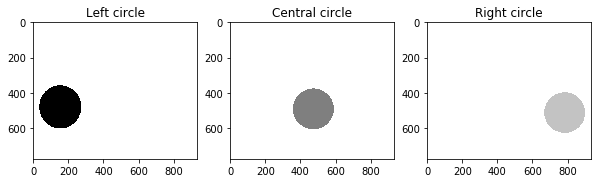

In [34]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(10,10)
axs[0].imshow(left)
axs[0].set_title("Left circle")
axs[1].imshow(central)
axs[1].set_title("Central circle")
axs[2].imshow(right)
axs[2].set_title("Right circle")
plt.show()

### 1.7 Color manipulation

a) Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

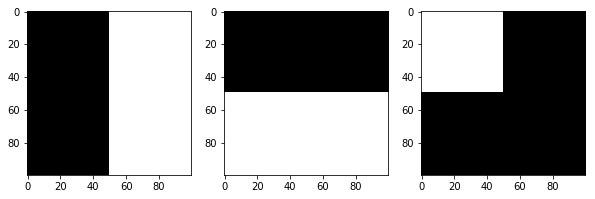

In [45]:
# As in the first exercisi in this practicum, we start with a black image and change to white the pixels necessary in order to
# obtain all the images above.
vert = np.zeros((100, 100))
vert[:, :50], vert[:, 50:] = 0, 255

horit = np.zeros((100, 100))
horit[:50, :], horit[50:, :] = 0, 255

square = np.zeros((100, 100))
square[:50, :50] = 255

fig, axs = plt.subplots(1,3)
fig.set_size_inches(10,10)
axs[0].imshow(vert, cmap='gray')
axs[1].imshow(horit, cmap='gray')
axs[2].imshow(square, cmap='gray')
plt.show()

b) Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


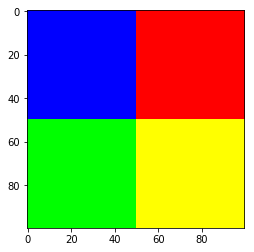

In [46]:
# Another image it's created. This one has 3 channels, so that the differents can be aplied.
sqcolor = np.zeros((100, 100, 3))

# Since to obtain yellow, red and green is necessary, we added the previous images while changing the colours. The order of the 
# operations do not matter as long as the blue is applied by using the single square image. If not the image won't match with
# the one above.
sqcolor[square == 255] += [0, 0, 255]
sqcolor[vert == 255] += [255, 0, 0]
sqcolor[horit == 255] += [0, 255, 0]

plt.imshow(sqcolor)

c) Read and visualize the image `sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

In [47]:
chairs = io.imread('images/sillas.jpg')

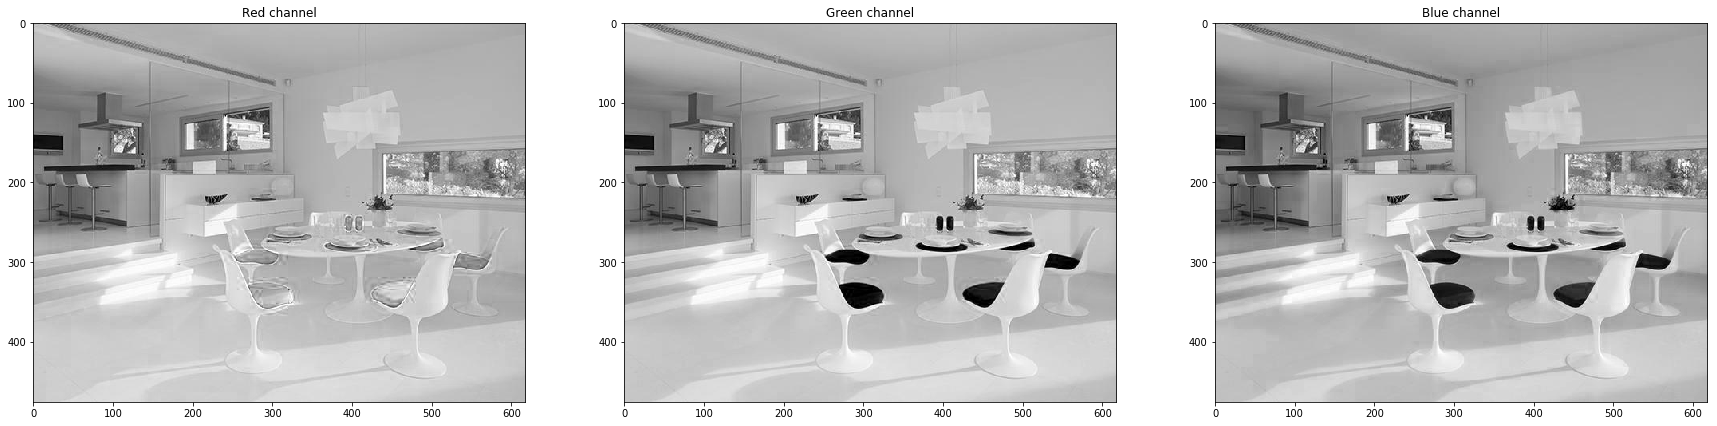

In [48]:
# We copy the correspondent channel to each image.
r_chairs = np.copy(chairs[:, :, 0])
g_chairs = np.copy(chairs[:, :, 1])
b_chairs = np.copy(chairs[:, :, 2])

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(30,30)
axs[0].imshow(r_chairs, cmap='gray')
axs[0].set_title("Red channel")
axs[1].imshow(g_chairs, cmap='gray')
axs[1].set_title("Green channel")
axs[2].imshow(b_chairs, cmap='gray')
axs[2].set_title("Blue channel")
plt.show()

d) Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/ex17c3.png">

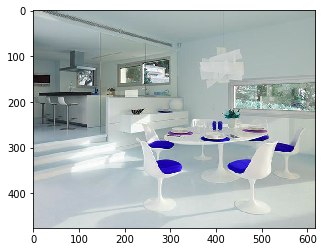

In [49]:
# Since we want the red chairs to be blue, we've exchanged the red and blue channels by using the images created in the exercise
# above.
blue_chairs = np.copy(chairs)
blue_chairs[:, :, 0], blue_chairs[:, :, 2] = b_chairs, r_chairs
plt.imshow(blue_chairs)

e) Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.

In [50]:
# We discard alpha channel.
coat = rgba2rgb(io.imread("images/coat.png"))
model = rgba2rgb(io.imread("images/model.png"))
coat.shape

(1188, 915, 3)

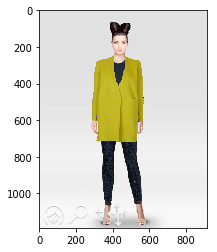

In [51]:
# The pixels that correspond to the coat are selected and the pixels corresponding to the coat are pasted. No for loops needed.
model[coat != 0] = coat[coat != 0]
plt.imshow(model)

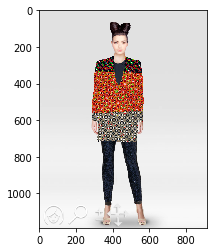

In [52]:
# Same procedure as before. First we need to replace the texture of coat. The new texture is loaded and the divided by 255 so
# that all the pixels are whithin the same range (0-255). Then the image is cropped, since we can't replace the coat texture
# unless the images have the same dimentions. For that we use slicing. Then the same procedure as before is performed.
# No for loops needed.
texture = io.imread("texture.png")/255
texture = texture[:coat.shape[0], :coat.shape[1]]
coat[coat != 0] = texture[coat != 0]
model[coat != 0] = coat[coat != 0]
plt.imshow(model)      

## Delivery

Compressed file **P1_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): October 3, 11:00 p.m.** 